In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
from astropy import stats as astats
import matplotlib.pyplot as plt
from scipy import integrate

In [7]:
def get_chisquare_stat(gamma_ini, sfe, ddof, dim):
    chi2 = []
    pvalue_chi2 = []

    for snap in np.arange(3, 797, 1):
        try:
            dmdr = pd.read_csv(INPUT_DIR / f'fit_dmdr_gamma={gamma_ini}_{sfe}_{snap}_{dim}.csv', 
                               header=0, delimiter=' ')
            n = []
            nfit = []
            for i in range(1, len(dmdr)+1):
                n.append(integrate.simps(dmdr.loc[:i, 'dmdr'], x=dmdr.loc[:i, 'r']))
                nfit.append(integrate.simps(dmdr.loc[:i, 'fit'], x=dmdr.loc[:i, 'r']))
            dmdr['n'] = n
            dmdr['nfit'] = nfit
            chi2_, pvalue_chi2_ = stats.chisquare(dmdr['n'], dmdr['nfit'], ddof=ddof)
        except: chi2_, pvalue_chi2_ = 'NaN', 0
        chi2.append(chi2_)
        pvalue_chi2.append(pvalue_chi2_)

    gof = pd.DataFrame(data = {
        'snap' : np.arange(3, 797, 1),
        'chi2' : chi2,
        'pvalue_chi2' : pvalue_chi2
    })
    
    nu = len(dmdr) - ddof
    chi_min = nu - np.sqrt(2 * nu)
    chi_max = nu + np.sqrt(2 * nu)
    return gof, chi_max

In [8]:
def get_akaike_stat(gamma_ini, sfe, dim, n):
    gof, chi_max = get_chisquare_stat(gamma_ini, sfe, dim)
    
    return gof['chi2'] + 2 * n + 2 * n * (n + 1) / (101 - n - 1)

In [9]:
def get_ks_test(gamma_ini, sfe, dim):
    distance = []
    pvalue_ks = []
    
    for snap in np.arange(3, 800, 1):
        dmdr = pd.read_csv(INPUT_DIR / f'fit_dmdr_gamma={gamma_ini}_{sfe}_{snap}_{dim}.csv', 
                           header=0, delimiter=' ')
        distance_, pvalue_ks_ = stats.kstest(dmdr['dmdr'], dmdr['fit'])
        distance.append(distance_)
        pvalue_ks.append(pvalue_ks_)
    gof = pd.DataFrame(data = {
        'snap' : np.arange(3, 800, 1),
        'distance' : distance,
        'pvalue_ks' : pvalue_ks
    })
    return gof

In [16]:
gamma_ini = '1.0'
sfe = '0.20'

INPUT_DIR = Path(f'./../experiment8/profiles_fit/gamma={gamma_ini}/')

gof, chi_max = get_chisquare_stat(gamma_ini, sfe, 5, 3)
# akaike = get_akaike_stat(gamma_ini, sfe, 3, 5)
# gof_ks = get_ks_test(gamma_ini, sfe, 3)

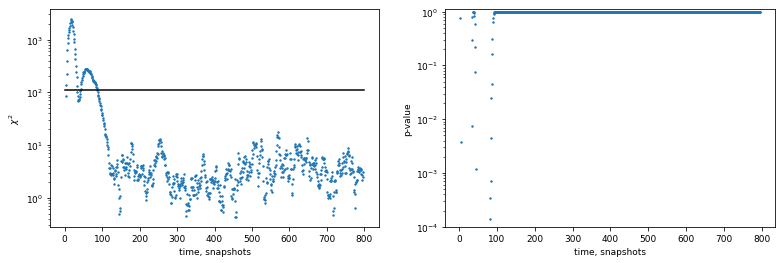

In [17]:
nrows = 1
ncols = 2
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(nrows, ncols, figsize=(13,4))

ax = axs[0]
ax.scatter(gof['snap'], gof['chi2'], s=2)
#ax.scatter(gof_ks['snap'], gof_ks['distance'], s=2)
#ax.scatter(gof['snap'], akaike, s=2)
ax.plot([0, 800], [chi_max, chi_max], c='black')
ax.set_ylabel(r'$\chi ^2$')
ax.set_xlabel('time, snapshots')
ax.set_yscale('log')

ax = axs[1]
ax.scatter(gof['snap'], gof['pvalue_chi2'], s=2)
#ax.scatter(gof_ks['snap'], gof_ks['pvalue_ks'], s=2)
ax.set_ylim(1e-4, 1.1e0)
ax.set_ylabel('p-value')
ax.set_xlabel('time, snapshots')
ax.set_yscale('log')
#plt.savefig(INPUT_DIR / f'./../../chi_square_gamma={gamma_ini}_sfe={sfe}.png', bbox_inches='tight')

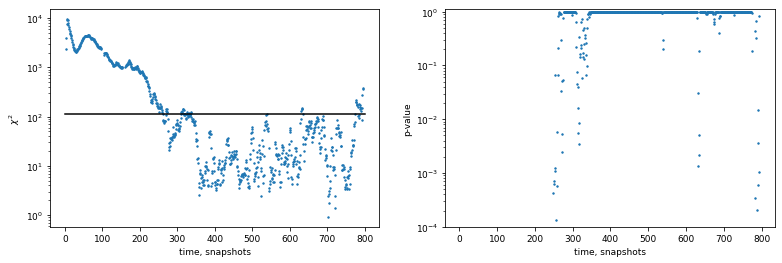

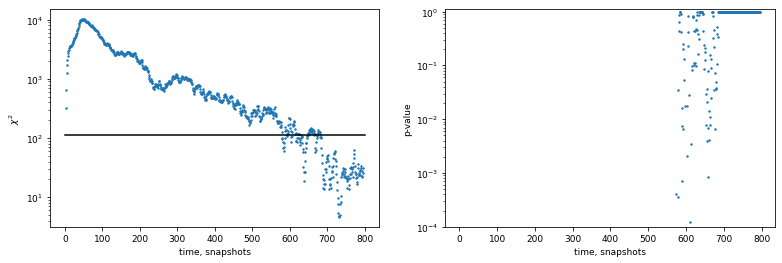

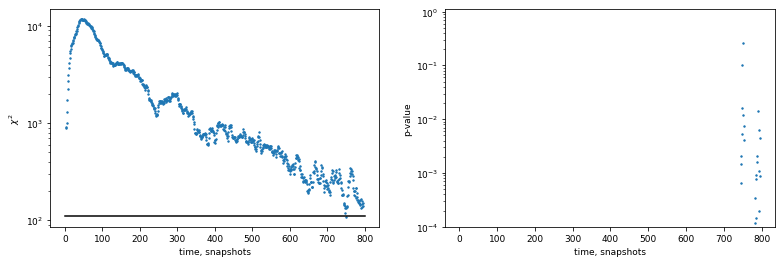

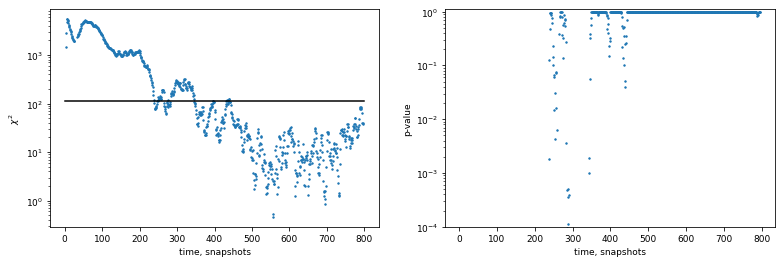

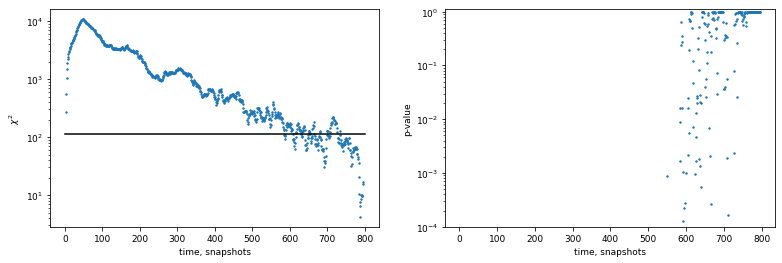

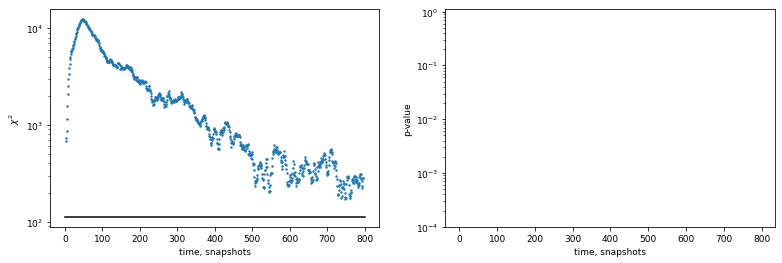

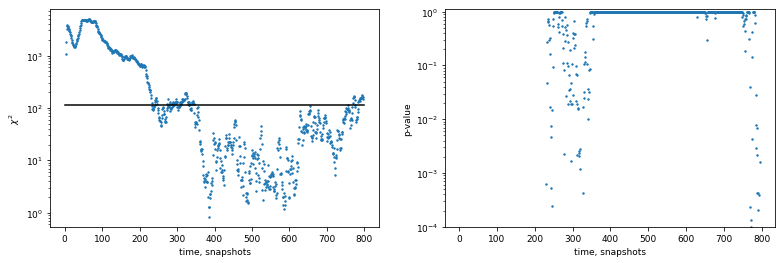

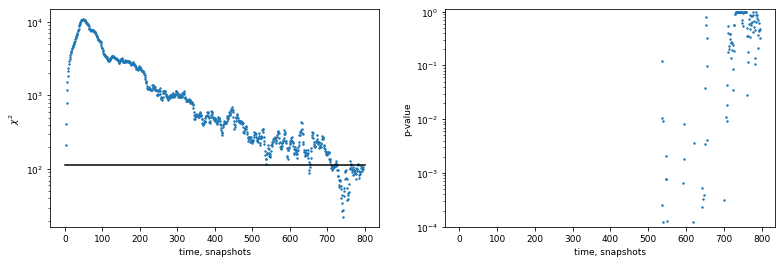

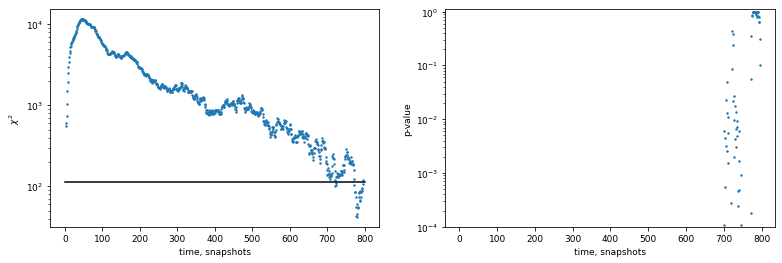

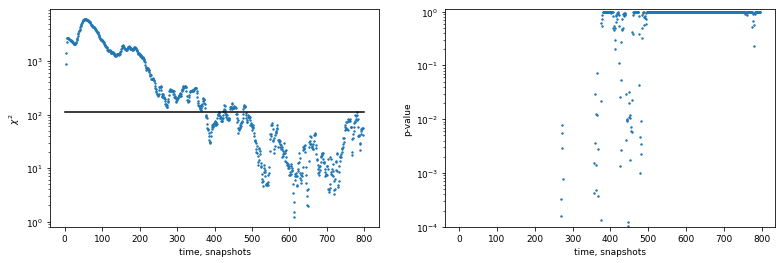

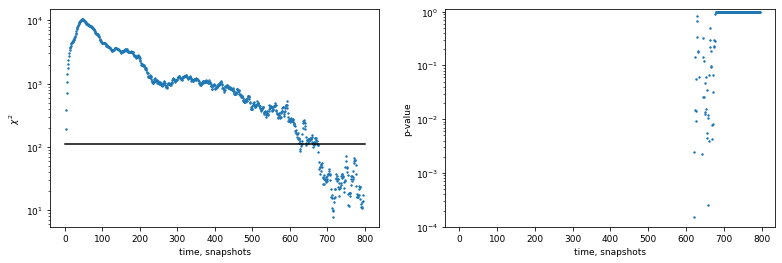

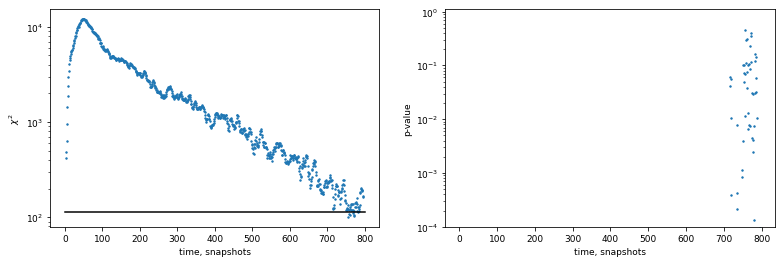

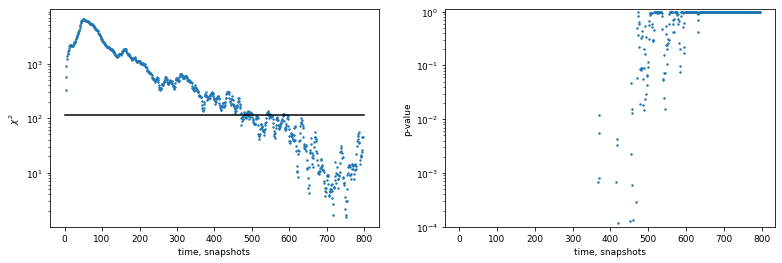

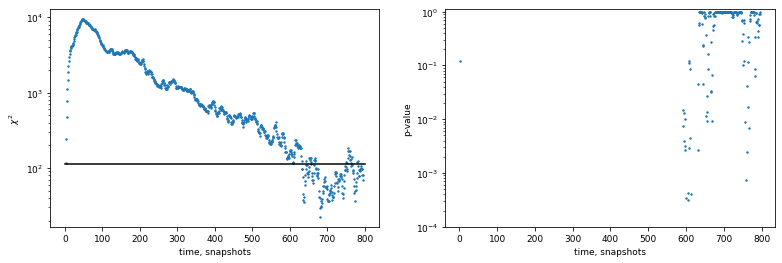

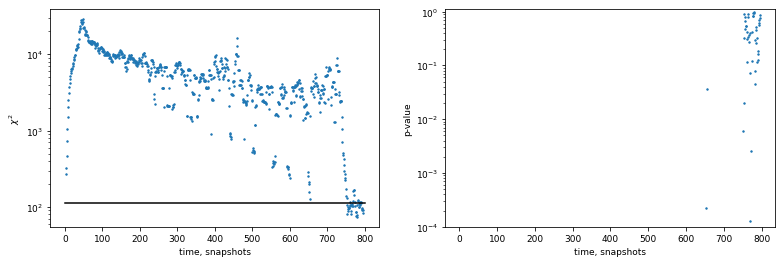

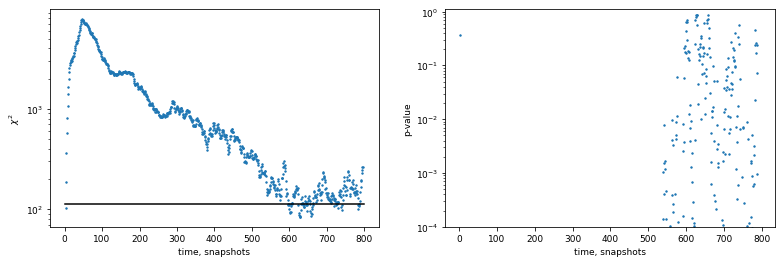

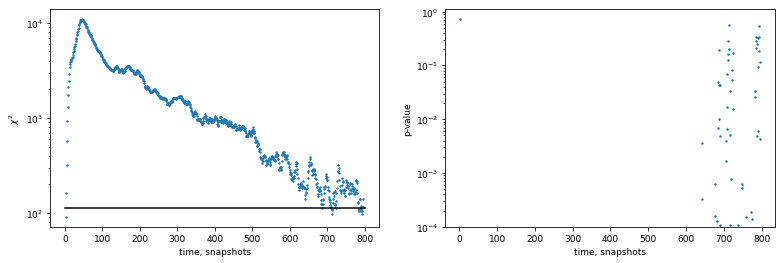

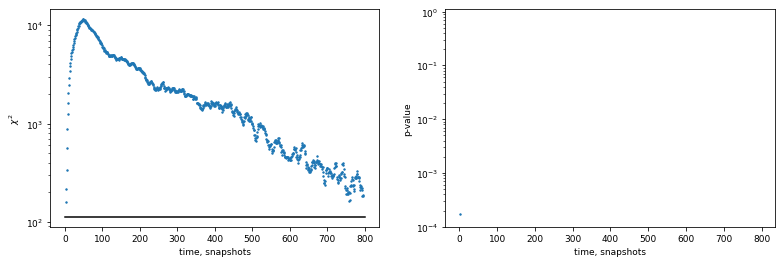

In [5]:
# loop
for gamma_ini in ['0.0', '0.5', '1.0', '1.5', '2.0', '2.5']:
    for sfe in ['0.05', '0.10', '0.20']:
# for gamma_ini in ['']:
#     for sfe in ['0.15', '0.20', '0.25']:
        INPUT_DIR = Path(f'./../experiment10/profiles_fit/gamma={gamma_ini}/')

        gof, chi_max = get_chisquare_stat(gamma_ini, sfe, 3, 3)
        
        nrows = 1
        ncols = 2
        plt.rcParams.update({'font.size': 9})
        fig, axs = plt.subplots(nrows, ncols, figsize=(13,4))

        ax = axs[0]
        ax.scatter(gof['snap'], gof['chi2'], s=2)
        #ax.scatter(gof_ks['snap'], gof_ks['distance'], s=2)
        #ax.scatter(gof['snap'], akaike, s=2)
        ax.plot([0, 800], [chi_max, chi_max], c='black')
        ax.set_ylabel(r'$\chi ^2$')
        ax.set_xlabel('time, snapshots')
        ax.set_yscale('log')

        ax = axs[1]
        ax.scatter(gof['snap'], gof['pvalue_chi2'], s=2)
        #ax.scatter(gof_ks['snap'], gof_ks['pvalue_ks'], s=2)
        ax.set_ylim(1e-4, 1.1e0)
        ax.set_ylabel('p-value')
        ax.set_xlabel('time, snapshots')
        ax.set_yscale('log')
        plt.savefig(INPUT_DIR / f'./../../chi_square_gamma={gamma_ini}_sfe={sfe}.png', bbox_inches='tight')

### Artciles

Bootstrap https://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/ 

Bootstrap implementation in astropy https://docs.astropy.org/en/stable/api/astropy.stats.bootstrap.html

Chi square https://web.archive.org/web/20171022032306/http://vassarstats.net:80/textbook/ch8pt1.html
https://web.archive.org/web/20171026121613/http://vassarstats.net/textbook/ch8pt2.html
           
About statistics http://articles.adsabs.harvard.edu/pdf/2006ASPC..351..127B
https://physics.stackexchange.com/questions/107682/kolmogorov-smirnov-test-vs-chi-squared-test
                 
KS test https://asaip.psu.edu/Articles/beware-the-kolmogorov-smirnov-test/

Slides about statistics http://astronomy.swin.edu.au/~cblake/StatsLecture3.pdf
